In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from cycler import cycler
%matplotlib inline

In [2]:
method_lis = ["ivtl_80deg_160ms_opt", "ivtl_80deg_160ms_vis", "idt_07deg_160ms_opt", "idt_07deg_160ms_vis", "ivdt_80deg_07deg_160ms_opt", "ivdt_80deg_07deg_160ms_vis"]

In [3]:
office_mean_res = []
office_se_res = []
surper_mean_res = []
surper_se_res = []
office_surper_mean_res =[]
office_surper_se_res = []

for i in range(len(method_lis)):
    method = method_lis[i]
    office_acc = pd.read_csv(f"../param/{method}/result_office.csv")["error"].values
    surper_acc = pd.read_csv(f"../param/{method}/result_supermarket.csv")["error"].values
    office_surper_acc = pd.read_csv(f"../param/{method}/result_office_supermarket.csv")["error"].values
    
    # Office
    office_mean = np.mean(office_acc)
    office_se = np.std(office_acc) / np.sqrt(len(office_acc))
    office_mean_res.append(office_mean)
    office_se_res.append(office_se)
    # Supermarket
    surper_mean = np.mean(surper_acc)
    surper_se = np.std(surper_acc) / np.sqrt(len(surper_acc))
    surper_mean_res.append(surper_mean)
    surper_se_res.append(surper_se)
    # Office + Supermarket
    office_surper_mean = np.mean(office_surper_acc)
    office_surper_se = np.std(office_surper_acc) / np.sqrt(len(office_surper_acc))
    office_surper_mean_res.append(office_surper_mean)
    office_surper_se_res.append(office_surper_se)
    
    print(method)
    print(office_mean, surper_mean, office_surper_mean)
    print(np.std(office_acc), np.std(surper_acc), np.std(office_surper_acc))

ivtl_80deg_160ms_opt
2.789777067943141 3.7576867894202164 2.816676494712032
1.3773827220269697 1.6411249176969556 1.4588213120946225
ivtl_80deg_160ms_vis
2.551346623908826 3.6512619033287694 2.7671405359936023
1.6341653244493974 1.49726332915678 1.451611774825346
idt_07deg_160ms_opt
2.506339860687929 2.6137855536069226 2.2653724769601515
1.119907862002482 0.7529622371402297 0.8879074453603277
idt_07deg_160ms_vis
1.470350613926863 1.5522332373439414 1.2008102506993072
0.5174798412656116 0.8901711618053754 0.6323673577430907
ivdt_80deg_07deg_160ms_opt
2.312997950319107 2.489448130347804 2.121419190952936
0.9727563767644677 0.827354855298034 0.7841945523507893
ivdt_80deg_07deg_160ms_vis
1.6282667203529226 1.6615416666279215 1.2949091417730487
0.8037987359688951 0.8617106546786957 0.6933722546904689


In [4]:
# visual axis
vis_list = pd.read_csv(f"../param/result_vis.csv")["error"].values
vis_list

array([0.80012295, 0.43520479, 0.78724993, 0.59461222, 0.6373133 ,
       0.91958179, 0.88820533, 0.55461869, 0.60344491, 0.63034385,
       0.71598471, 0.82313516, 0.96964831, 0.99964933, 0.81801031,
       0.79584934, 0.69254139, 0.44117681])

In [5]:
# optical axis
opt_list = pd.read_csv(f"../param/result_opt.csv")["error"].values
opt_list

array([3.59125349, 3.61406105, 3.80599555, 3.77463404, 3.9121636 ,
       3.83874988, 3.89760795, 3.59756223, 3.75799297, 3.71549811,
       3.59459929, 3.86108717, 3.4652001 , 3.45597127, 3.55426093,
       3.76135457, 3.70980704, 3.6659708 ])

In [6]:
vis_mean = np.mean(vis_list)
vis_se = np.std(vis_list) / np.sqrt(len(vis_list))
opt_mean = np.mean(opt_list)
opt_se = np.std(opt_list) / np.sqrt(len(opt_list))

print(vis_mean, vis_se)
print(opt_mean, opt_se)

0.7281496183174743 0.0383112240360988
3.698542780357624 0.0319812301576659


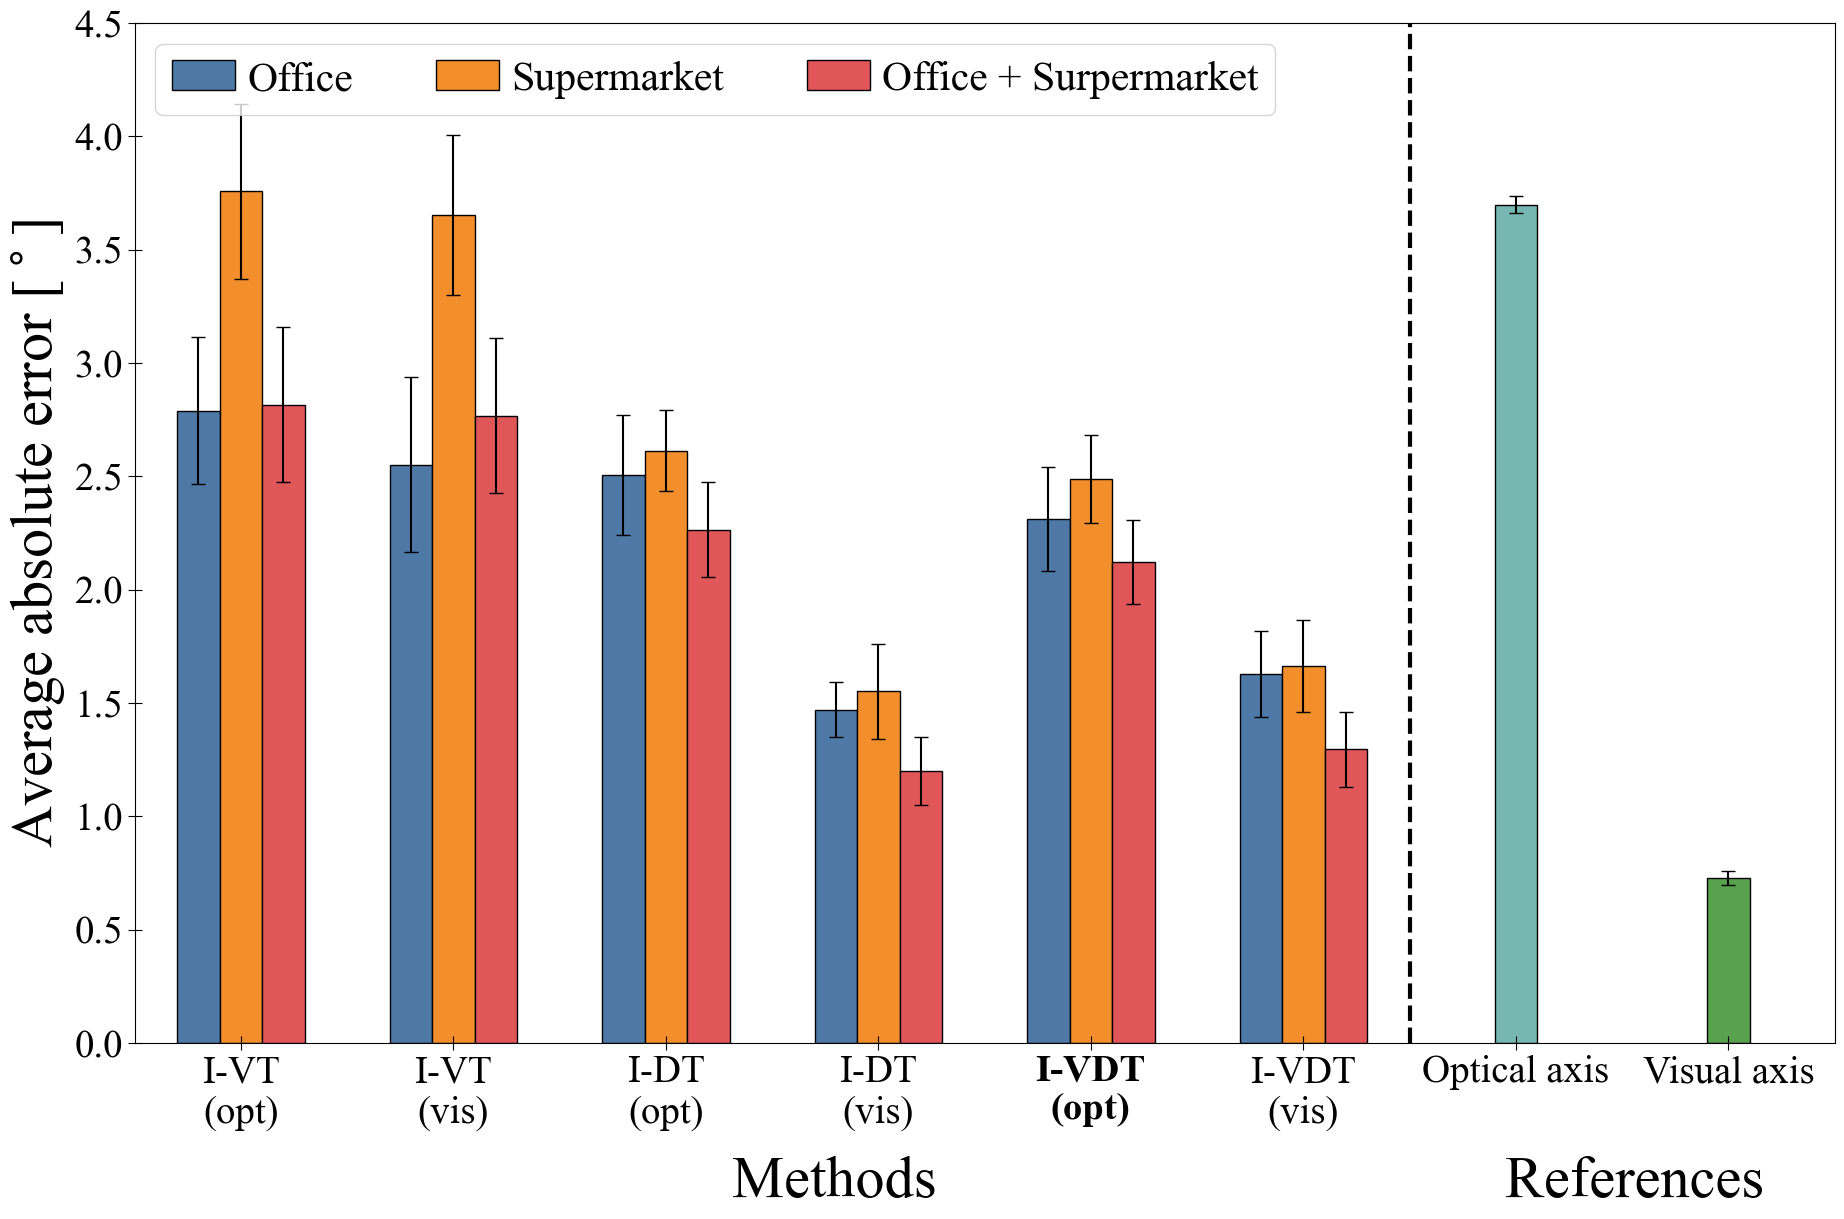

In [7]:
font_size = 42

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['axes.prop_cycle']  = cycler(color=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2','#59A14E', '#EDC949','#B07AA2','#FF9DA7','#9C755F','#BAB0AC'])
fig, ax = plt.subplots(figsize=(20, 12))
fig.patch.set_facecolor("white")

label_x = ["I-VT\n(opt)", "I-VT\n(vis)", "I-DT\n(opt)", "I-DT\n(vis)", "I-VDT\n(opt)", "I-VDT\n(vis)", "Optical axis", "Visual axis"]

x_lis = np.arange(0.5, 3.5, 0.5)
office_x_lis = x_lis - 0.1
surper_x_lis = x_lis
office_surper_x_lis = x_lis + 0.1

p_office = plt.bar(office_x_lis, office_mean_res, width=0.1, color="C0", edgecolor="black", linewidth=1.0, yerr=office_se_res, capsize=5)
p_surper = plt.bar(surper_x_lis, surper_mean_res, width=0.1, color="C1", edgecolor="black", linewidth=1.0, yerr=surper_se_res, capsize=5)
p_office_surper = plt.bar(office_surper_x_lis, office_surper_mean_res, width=0.1, color="C2", edgecolor="black", linewidth=1.0, yerr=office_surper_se_res, capsize=5)
p_init = plt.bar(3.5, opt_mean, width=0.1, color="C3", edgecolor="black", linewidth=1.0, yerr=vis_se, capsize=5)
p_base = plt.bar(4.0, vis_mean, width=0.1, color="C4", edgecolor="black", linewidth=1.0, yerr=opt_se, capsize=5)

plt.axvline(3.25, ls = "--", color = "k", lw=3)
plt.text(1.75/4.25, -0.15, "Methods", fontsize=font_size, horizontalalignment='center', transform=ax.transAxes)
plt.text(3.75/4.25, -0.15, "References", fontsize=font_size, horizontalalignment='center', transform=ax.transAxes)

plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0], label_x, fontsize=28)
ax.get_xticklabels()[4].set_fontweight("bold")
plt.yticks(fontsize=28)
plt.tick_params(direction = "inout", length=10)

plt.xlim(0.25, 4.25)
plt.ylim(0.0, 4.5)
plt.legend((p_office[0], p_surper[0], p_office_surper[0]), ("Office", "Supermarket", "Office + Surpermarket"), loc='upper left', ncol=3, handlelength=1.5, handletextpad=0.3, fontsize=30)
plt.ylabel(r"Average absolute error [$^\circ$]", size=font_size)
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)
plt.savefig("../figures/abs_result.png",bbox_inches='tight')
plt.show()